# Análisis de datos en el ecosistema Python

### 22/04/2023

## Análisis de accidentes de tráfico en la ciudad de Madrid

La ciudad de Madrid es una de las más grandes y transitadas de España, lo que la convierte en un lugar propenso a **accidentes de tráfico**. En este trabajo, se realizará un análisis de datos de los **accidentes de tráfico** registrados en la ciudad de **Madrid** por la Policía Municipal **desde 2019 hasta el presente año 2023**.

Gracias a la **web de [Datos Abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.400a817358ce98c34e937436a8a409a0/?vgnextoid=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)**, los datos de accidentalidad en la ciudad de Madrid están públicamente disponibles e incluyen **datos históricos desde 2010 hasta la actualidad**.

Vamos a utilizar **una muestra** que se ha preparado en base a estos datos que muestran los **accidentes de tráfico** en la ciudad de **Madrid** según diferentes variables. Se incluye un registro por persona implicada en el accidente.

El objetivo de este análisis es **determinar patrones y tendencias** en los accidentes de tráfico para poder entender mejor las causas de estos incidentes y **tomar medidas para prevenirlos**. Para ello, se utilizarán herramientas de **análisis de datos en Python**, lo que permitirá una exploración detallada de los datos y la generación de gráficos y estadísticas relevantes.

In [165]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
%matplotlib inline

In [166]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datospara el modelo

In [250]:
# Cargar el dataset desde un archivo
df = pd.read_csv('../data/2019-2023_Accidentalidad.csv', sep=';' , on_bad_lines='skip')
df

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,NaN
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,NaN
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"439139,603","4470836,854",S,NaN
3,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,NaN
4,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138210,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,NaN
138211,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,NaN
138212,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,NaN,NaN,"442561,327","4471590,75",N,NaN
138213,2023S014588,17/03/2023,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,NaN,"441499,788","4478869,639",N,NaN


In [248]:
# Consultar los resgistro de DataFrame
df_accidentes

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,NaN
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,NaN
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"439139,603","4470836,854",S,NaN
3,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,NaN
4,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138210,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,NaN
138211,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,NaN
138212,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,NaN,NaN,"442561,327","4471590,75",N,NaN
138213,2023S014588,17/03/2023,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,NaN,"441499,788","4478869,639",N,NaN


In [169]:
# Contar datos perdidio/fantantes
df_accidentes.isna().sum()

num_expediente               0
fecha                        0
hora                         0
localizacion                 0
numero                       6
cod_distrito                 6
distrito                     6
tipo_accidente               4
estado_meteorológico     14169
tipo_vehiculo              464
tipo_persona                 3
rango_edad                   0
sexo                         0
cod_lesividad            61455
lesividad                61455
coordenada_x_utm             4
coordenada_y_utm             4
positiva_alcohol           430
positiva_droga          137832
dtype: int64

In [170]:
# La información útil sobre los datos guardados en formato dataFrame
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138215 entries, 0 to 138214
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   num_expediente        138215 non-null  object 
 1   fecha                 138215 non-null  object 
 2   hora                  138215 non-null  object 
 3   localizacion          138215 non-null  object 
 4   numero                138209 non-null  object 
 5   cod_distrito          138209 non-null  float64
 6   distrito              138209 non-null  object 
 7   tipo_accidente        138211 non-null  object 
 8   estado_meteorológico  124046 non-null  object 
 9   tipo_vehiculo         137751 non-null  object 
 10  tipo_persona          138212 non-null  object 
 11  rango_edad            138215 non-null  object 
 12  sexo                  138215 non-null  object 
 13  cod_lesividad         76760 non-null   float64
 14  lesividad             76760 non-null   object 
 15  

In [171]:
#Contar los valores nulos para este campo

df_accidentes['positiva_droga'].isna().sum()

137832

In [172]:
#Mostrar los valores nulos de este campo
df_accidentes['positiva_droga'][df_accidentes['positiva_droga'].isna()]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
138210   NaN
138211   NaN
138212   NaN
138213   NaN
138214   NaN
Name: positiva_droga, Length: 137832, dtype: float64

In [173]:
df_accidentes['positiva_droga']= df_accidentes['positiva_droga'].fillna(0)

In [174]:
df_accidentes

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,Conductor,De 45 a 49 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0
1,2018S017842,04/02/2019,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"439139,603","4470836,854",S,0.0
3,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
4,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138210,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0
138211,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0
138212,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,NaN,NaN,"442561,327","4471590,75",N,0.0
138213,2023S014588,17/03/2023,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,NaN,"441499,788","4478869,639",N,0.0


In [175]:
#Consulta los registro que tienen algun valor nulo
df_accidentes.drop(df_accidentes.dropna().index)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
2,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"439139,603","4470836,854",S,0.0
3,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 40 a 44 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
4,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Conductor,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
5,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Pasajero,De 45 a 49 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
6,2019S000001,01/01/2019,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,Pasajero,De 65 a 69 años,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138210,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 25 a 29 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0
138211,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Conductor,De 40 a 44 años,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0
138212,2023S013443,31/03/2023,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,NaN,NaN,"442561,327","4471590,75",N,0.0
138213,2023S014588,17/03/2023,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,Conductor,Desconocido,Desconocido,NaN,NaN,"441499,788","4478869,639",N,0.0


In [176]:
# El tamanio esperado para el dataset limpio
df_accidentes.shape[0]-63167

75048

In [177]:
# Convertir la columna "fecha" a un objeto de tipo fecha
df_accidentes['fecha'] = pd.to_datetime(df_accidentes['fecha'], format='%d/%m/%Y')

# Extraer los componentes de fecha necesarios en tres nuevas columnas
df_accidentes['dia'] = df_accidentes['fecha'].dt.day
df_accidentes['mes'] = df_accidentes['fecha'].dt.month
df_accidentes['año'] = df_accidentes['fecha'].dt.year

# Verificar los resultados
print(df_accidentes.head())

df_accidentes

  num_expediente      fecha     hora   
0    2018S017842 2019-02-04  9:10:00  \
1    2018S017842 2019-02-04  9:10:00   
2    2019S000001 2019-01-01  3:45:00   
3    2019S000001 2019-01-01  3:45:00   
4    2019S000001 2019-01-01  3:45:00   

                                        localizacion numero  cod_distrito   
0                          CALL. ALBERTO AGUILERA, 1      1           1.0  \
1                          CALL. ALBERTO AGUILERA, 1      1           1.0   
2  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168          11.0   
3  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168          11.0   
4  PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA    168          11.0   

      distrito    tipo_accidente estado_meteorológico        tipo_vehiculo   
0       CENTRO  Colisión lateral            Despejado  Motocicleta > 125cc  \
1       CENTRO  Colisión lateral            Despejado              Turismo   
2  CARABANCHEL           Alcance                  NaN         

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,dia,mes,año
0,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,...,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019
1,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,...,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019
2,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,...,Hombre,NaN,NaN,"439139,603","4470836,854",S,0.0,1,1,2019
3,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,...,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0,1,1,2019
4,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,...,Mujer,NaN,NaN,"439139,603","4470836,854",N,0.0,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138210,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,...,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023
138211,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,Hombre,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023
138212,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,Mujer,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023
138213,2023S014588,2023-03-17,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,...,Desconocido,NaN,NaN,"441499,788","4478869,639",N,0.0,17,3,2023


In [178]:
df_accidentes["Hora"] = 0

def obtener_hora(hora):
    partes = hora.split(":")
    return int(partes[0])

df_accidentes["Hora"] = df_accidentes["hora"].apply(obtener_hora)


def asignar_intervalo(hora):
    return hora // 1  # Obtiene la parte entera de la hora, es decir, el intervalo horario correspondiente

    
df_accidentes["Hora"] = df_accidentes["Hora"].apply(asignar_intervalo)

df_accidentes.to_csv("../data/2023-2019_Accidentalidad.csv", index=False)


In [179]:
df_accidentes

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,dia,mes,año,Hora
0,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019,9
1,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019,9
2,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Furgoneta,...,NaN,NaN,"439139,603","4470836,854",S,0.0,1,1,2019,3
3,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,...,NaN,NaN,"439139,603","4470836,854",N,0.0,1,1,2019,3
4,2019S000001,2019-01-01,3:45:00,PASEO. SANTA MARIA DE LA CABEZA / PLAZA. ELIPTICA,168,11.0,CARABANCHEL,Alcance,NaN,Turismo,...,NaN,NaN,"439139,603","4470836,854",N,0.0,1,1,2019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138210,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Motocicleta hasta 125cc,...,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023,13
138211,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023,13
138212,2023S013443,2023-03-31,13:30:00,CALL. MENDEZ ALVARO / CALL. RETAMA,93,13.0,PUENTE DE VALLECAS,Alcance,Despejado,Turismo,...,NaN,NaN,"442561,327","4471590,75",N,0.0,31,3,2023,13
138213,2023S014588,2023-03-17,11:50:00,PASEO. CASTELLANA / CUZCO,162,5.0,CHAMARTÍN,Alcance,Despejado,NaN,...,NaN,NaN,"441499,788","4478869,639",N,0.0,17,3,2023,11


Para evitar problemas posteriores, usamos el método ``dropna()`` para limpiar el tablón de valores perdidos (**missing values**) y reiniciamos el índice. Comprobamos la cantidad de las filas filtradas.

In [180]:
df_accident_filt=df_accidentes.dropna().reset_index(drop=True)
df_accident_filt

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,...,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga,dia,mes,año,Hora
0,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Motocicleta > 125cc,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019,9
1,2018S017842,2019-02-04,9:10:00,"CALL. ALBERTO AGUILERA, 1",1,1.0,CENTRO,Colisión lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"440068,049","4475679,17",N,0.0,4,2,2019,9
2,2019S000002,2019-01-01,3:50:00,"CALL. CUART DE POBLET, 65",65,10.0,LATINA,Choque contra obstáculo fijo,Despejado,Turismo,...,2.0,Ingreso inferior o igual a 24 horas,"436473,789","4472030,489",N,0.0,1,1,2019,3
3,2019S000006,2019-01-01,8:10:00,CALL. CASTRO DE ORO / CALL. FERREIRA,16,11.0,CARABANCHEL,Choque contra obstáculo fijo,Despejado,Turismo,...,14.0,Sin asistencia sanitaria,"438116,128","4471171,19",S,0.0,1,1,2019,8
4,2019S000006,2019-01-01,8:10:00,CALL. CASTRO DE ORO / CALL. FERREIRA,16,11.0,CARABANCHEL,Choque contra obstáculo fijo,Despejado,Turismo,...,14.0,Sin asistencia sanitaria,"438116,128","4471171,19",N,0.0,1,1,2019,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75043,2023S012808,2023-03-31,13:50:00,CALL. ARROYO DE LA MEDIA LEGUA / AVDA. DOCTOR ...,35,14.0,MORATALAZ,Colisión fronto-lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"444517,233","4473727,959",N,0.0,31,3,2023,13
75044,2023S012808,2023-03-31,13:50:00,CALL. ARROYO DE LA MEDIA LEGUA / AVDA. DOCTOR ...,35,14.0,MORATALAZ,Colisión fronto-lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"444517,233","4473727,959",N,0.0,31,3,2023,13
75045,2023S012808,2023-03-31,13:50:00,CALL. ARROYO DE LA MEDIA LEGUA / AVDA. DOCTOR ...,35,14.0,MORATALAZ,Colisión fronto-lateral,Despejado,Turismo,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"444517,233","4473727,959",N,0.0,31,3,2023,13
75046,2023S012851,2023-03-31,21:55:00,CALL. VIA LUSITANA / AGUACA,150,11.0,CARABANCHEL,Colisión fronto-lateral,Despejado,Motocicleta > 125cc,...,7.0,Asistencia sanitaria sólo en el lugar del acci...,"437092,131","4468860,663",N,0.0,31,3,2023,21


In [181]:
df_accident_filt.info()
df_accident_filt['positiva_alcohol']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75048 entries, 0 to 75047
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   num_expediente        75048 non-null  object        
 1   fecha                 75048 non-null  datetime64[ns]
 2   hora                  75048 non-null  object        
 3   localizacion          75048 non-null  object        
 4   numero                75048 non-null  object        
 5   cod_distrito          75048 non-null  float64       
 6   distrito              75048 non-null  object        
 7   tipo_accidente        75048 non-null  object        
 8   estado_meteorológico  75048 non-null  object        
 9   tipo_vehiculo         75048 non-null  object        
 10  tipo_persona          75048 non-null  object        
 11  rango_edad            75048 non-null  object        
 12  sexo                  75048 non-null  object        
 13  cod_lesividad   

0        N
1        N
2        N
3        S
4        N
        ..
75043    N
75044    N
75045    N
75046    N
75047    N
Name: positiva_alcohol, Length: 75048, dtype: object

### Analisis

In [182]:
#La caracteristicas de cad columna
df_accident_filt.describe()

,fecha,cod_distrito,cod_lesividad,positiva_droga,dia,mes,año,Hora
count,75048,75048.000000,75048.000000,75048.000000,75048.000000,75048.000000,75048.000000,75048.000000
mean,2020-08-21 07:19:33.137191936,9.603760,9.925141,0.003997,15.787176,6.359570,2020.152542,14.301207
min,2019-01-01 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,2019.000000,0.000000
25%,2019-08-29 00:00:00,5.000000,7.000000,0.000000,8.000000,3.000000,2019.000000,11.000000
50%,2020-07-12 00:00:00,9.000000,14.000000,0.000000,16.000000,6.000000,2020.000000,15.000000
75%,2021-06-26 00:00:00,14.000000,14.000000,0.000000,24.000000,10.000000,2021.000000,19.000000
max,2023-03-31 00:00:00,21.000000,77.000000,1.000000,31.000000,12.000000,2023.000000,23.000000
std,NaN,5.677768,4.737002,0.063099,8.841290,3.628251,1.183553,5.471384


In [183]:
#Consultamos el tipo de datos
df_accident_filt.dtypes

num_expediente                  object
fecha                   datetime64[ns]
hora                            object
localizacion                    object
numero                          object
cod_distrito                   float64
distrito                        object
tipo_accidente                  object
estado_meteorológico            object
tipo_vehiculo                   object
tipo_persona                    object
rango_edad                      object
sexo                            object
cod_lesividad                  float64
lesividad                       object
coordenada_x_utm                object
coordenada_y_utm                object
positiva_alcohol                object
positiva_droga                 float64
dia                              int32
mes                              int32
año                              int32
Hora                             int64
dtype: object

Los algoritmos **entienden de números y no otra cosa!**, con lo cual para que el algoritmo pueda trabajar con toda la información del dataset, los datos se tienen que **transformar en valores numéricos**.

In [184]:
#Consultar las variables que son del tipo "string"
df_accident_filt.dtypes[df_accident_filt.dtypes=='object']

num_expediente          object
hora                    object
localizacion            object
numero                  object
distrito                object
tipo_accidente          object
estado_meteorológico    object
tipo_vehiculo           object
tipo_persona            object
rango_edad              object
sexo                    object
lesividad               object
coordenada_x_utm        object
coordenada_y_utm        object
positiva_alcohol        object
dtype: object

Nos interesa el tipo de accidentes, vehiculo ,persona ,levisidad y el positiva de alcohol

In [185]:
#Analizar las tipo de accidentes
df_accident_filt['tipo_accidente'].value_counts()

tipo_accidente
Colisión fronto-lateral         20955
Alcance                         18634
Atropello a persona              8406
Colisión lateral                 7801
Caída                            7578
Colisión múltiple                5081
Choque contra obstáculo fijo     3624
Colisión frontal                 1868
Otro                              499
Vuelco                            284
Solo salida de la vía             230
Atropello a animal                 83
Despeñamiento                       5
Name: count, dtype: int64

In [186]:
df_accident_filt['tipo_persona'].value_counts()

tipo_persona
Conductor    56386
Pasajero     14269
Peatón        4393
Name: count, dtype: int64

In [187]:
df_accident_filt['tipo_vehiculo'].value_counts()

tipo_vehiculo
Turismo                              47026
Motocicleta hasta 125cc               7309
Motocicleta > 125cc                   5772
Furgoneta                             4338
Bicicleta                             2177
Autobús                               2142
Ciclomotor                            1773
Camión rígido                         1130
Todo terreno                           965
VMU eléctrico                          829
Otros vehículos con motor              389
Bicicleta EPAC (pedaleo asistido)      269
Tractocamión                           178
Autobús articulado                     168
Maquinaria de obras                    136
Autobus EMT                             93
Vehículo articulado                     72
Ciclo                                   62
Sin especificar                         51
Patinete                                35
Cuadriciclo no ligero                   31
Cuadriciclo ligero                      30
Moto de tres ruedas > 125cc             

In [188]:
df_accident_filt['positiva_alcohol'].value_counts()

positiva_alcohol
N    73339
S     1709
Name: count, dtype: int64

En la lista ``columnas_drop`` definimos las columnas a eliminar del dataset por ser meramente informativas.

In [189]:
columnas_drop = ["num_expediente",
                 "hora",
                 'fecha',
                 "localizacion",
                 "numero",
                 "distrito",
                 "sexo",
                 "estado_meteorológico"
                 ,"lesividad"
                 ,'coordenada_x_utm',
                 'coordenada_y_utm'
                 ]

Creamos un nuevo dataset que sea como el tablón anterior, eliminando las columnas de la lista indicada. Utilizamos el método `drop` para _DataFrames_ de _pandas_.

In [190]:
df_accident_filt2 = df_accident_filt.drop(columns=columnas_drop)
print("Tamaño del tablón filtrado: ", df_accident_filt.shape)
print("Tamaño del tablón nuevo: ", df_accident_filt2.shape)

Tamaño del tablón filtrado:  (75048, 23)
Tamaño del tablón nuevo:  (75048, 12)


In [191]:
# Tipología de las variables exsitentes en el nuevo dataset
df_accident_filt2.dtypes.value_counts()

object     5
float64    3
int32      3
int64      1
Name: count, dtype: int64

In [192]:
from sklearn.preprocessing import LabelEncoder
etiquetado = LabelEncoder()
etiquetado.fit(df_accident_filt2['positiva_alcohol'])

LabelEncoder()

In [193]:
etiquetado.classes_

array(['N', 'S'], dtype=object)

In [194]:
# Transformamos el dataset aplicando el mapeado:
etiquetado.transform(df_accident_filt2['positiva_alcohol'])

array([0, 0, 0, ..., 0, 0, 0])

In [195]:
# Asignar una nueva columna
df_accident_filt2['Positiva_alcohol']= etiquetado.transform(df_accident_filt2['positiva_alcohol'])


In [196]:
# Definimos un nuevo dataframe con solamente datos transformados a valores númericos.
df_accident_filt2 = df_accident_filt2.drop('positiva_alcohol', axis = 'columns')

# Consultar e tipo de las variables
df_accident_filt2.dtypes.value_counts()

object     4
int32      4
float64    3
int64      1
Name: count, dtype: int64

In [197]:
etiquetado.fit(df_accident_filt2['tipo_persona'])

LabelEncoder()

In [198]:
etiquetado.transform(df_accident_filt2['tipo_persona'])

array([0, 0, 0, ..., 1, 0, 0])

In [199]:
df_accident_filt2['Tipo_persona'] = etiquetado.transform(df_accident_filt2['tipo_persona'])

df_accident_filt3 = df_accident_filt2.drop('tipo_persona',axis='columns')

In [200]:
# utilizamos estas listas como categorías para poder agruparlos.
coche = ['turismo','Todo terreno','Otros vehículos con motor','Moto de tres ruedas hasta 125cc']
moto = ['Motocicleta hasta 125cc','Motocicleta > 125cc','Moto de tres ruedas > 125cc',]
vehículos_grandes= ['Furgoneta','Autobús','Camión rígido','Tractocamión','Autobús articulado','Maquinaria de obras','Autobus EMT','Vehículo articulado','Autocaravana','Autobús articulado EMT','Microbús <= 17 plazas','Ambulancia SAMUR','Camión de bomberos']
ciclo = ['Ciclomotor','VMU eléctrico','Ciclo','Cuadriciclo no ligero','Cuadriciclo ligero','Ciclomotor de dos ruedas L1e-B','Ciclomotor de tres ruedas','Ciclo de motor L1e-A']
otro =['Bicicleta','Bicicleta EPAC (pedaleo asistido)','Sin especificar','Patinete','Otros vehículos sin motor','Maquinaria agrícola','Patinete no eléctrico','Remolque','Semiremolque']


In [201]:
df_accident_filt4 = df_accident_filt3.copy()

df_accident_filt4['tipo_vehiculo'] = df_accident_filt4['tipo_vehiculo'].apply(lambda x: 'coche' if x in coche else 
                                                                                                'vehiculo_grnade' if x in vehículos_grandes else
                                                                                                'moto' if x in moto else
                                                                                                'ciclo' if x in ciclo else
                                                                                                'otro' )

In [202]:
df_accident_filt4['tipo_vehiculo'].value_counts()
etiquetado.fit(df_accident_filt4['tipo_vehiculo'])

LabelEncoder()

In [203]:
df_accident_filt4['Tipo_vehiculo'] = etiquetado.transform(df_accident_filt4['tipo_vehiculo'])
df_accident_filt4 = df_accident_filt4.drop('tipo_vehiculo',axis='columns')
df_accident_filt4

,cod_distrito,tipo_accidente,rango_edad,cod_lesividad,positiva_droga,dia,mes,año,Hora,Positiva_alcohol,Tipo_persona,Tipo_vehiculo
0,1.0,Colisión lateral,De 45 a 49 años,7.0,0.0,4,2,2019,9,0,0,2
1,1.0,Colisión lateral,De 30 a 34 años,7.0,0.0,4,2,2019,9,0,0,3
2,10.0,Choque contra obstáculo fijo,De 21 a 24 años,2.0,0.0,1,1,2019,3,0,0,3
3,11.0,Choque contra obstáculo fijo,De 21 a 24 años,14.0,0.0,1,1,2019,8,1,0,3
4,11.0,Choque contra obstáculo fijo,De 55 a 59 años,14.0,0.0,1,1,2019,8,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
75043,14.0,Colisión fronto-lateral,De 60 a 64 años,7.0,0.0,31,3,2023,13,0,1,3
75044,14.0,Colisión fronto-lateral,De 65 a 69 años,7.0,0.0,31,3,2023,13,0,1,3
75045,14.0,Colisión fronto-lateral,Más de 74 años,7.0,0.0,31,3,2023,13,0,1,3
75046,11.0,Colisión fronto-lateral,De 30 a 34 años,7.0,0.0,31,3,2023,21,0,0,2


In [204]:
# utilizamos estas listas como categorías para poder agruparlos.
choque = ['Colisión fronto-lateral',' Colisión lateral','Colisión múltiple','Colisión frontal','Choque contra obstáculo fijo']
atopello = ['Atropello a peatón','Atropello a animal']
caida = ['Caída', 'Despeñamiento','Alcance']
otros = ['Otro', 'Solo salida de la vía','vuelco']
df_accident_filt4['tipo_accidente'] = df_accident_filt4['tipo_accidente'].apply(lambda x: 'choque' if x in choque else 
                                                                                                'atopello' if x in atopello else
                                                                                                'caida' if x in caida else
                                                                                                'otros' )



In [205]:
etiquetado.fit(df_accident_filt4['tipo_accidente'])
df_accident_filt4['Tipo_accidente'] = etiquetado.transform(df_accident_filt4['tipo_accidente'])
df_accident_filt4 = df_accident_filt4.drop('tipo_accidente',axis='columns')
df_accident_filt4

,cod_distrito,rango_edad,cod_lesividad,positiva_droga,dia,mes,año,Hora,Positiva_alcohol,Tipo_persona,Tipo_vehiculo,Tipo_accidente
0,1.0,De 45 a 49 años,7.0,0.0,4,2,2019,9,0,0,2,3
1,1.0,De 30 a 34 años,7.0,0.0,4,2,2019,9,0,0,3,3
2,10.0,De 21 a 24 años,2.0,0.0,1,1,2019,3,0,0,3,2
3,11.0,De 21 a 24 años,14.0,0.0,1,1,2019,8,1,0,3,2
4,11.0,De 55 a 59 años,14.0,0.0,1,1,2019,8,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
75043,14.0,De 60 a 64 años,7.0,0.0,31,3,2023,13,0,1,3,2
75044,14.0,De 65 a 69 años,7.0,0.0,31,3,2023,13,0,1,3,2
75045,14.0,Más de 74 años,7.0,0.0,31,3,2023,13,0,1,3,2
75046,11.0,De 30 a 34 años,7.0,0.0,31,3,2023,21,0,0,2,2


In [206]:
#Agrupamos el rango de edad
cero_diez = ["De 6 a 9 años",'Menor de 5 años']
diez_vente = ['De 10 a 14 años','De 15 a 17 años','De 18 a 20 años']
vente_trenta = ['De 21 a 24 años','De 25 a 29 años']
trenta_curenta = ['De 30 a 34 años','De 35 a 39 años']
cuarenta_cincuenta = ['De 40 a 44 años','De 45 a 49 años']
cincuenta_sesenta =['De 55 a 59 años','De 50 a 54 años']
sesenta_setenta= ['De 60 a 64 años','De 65 a 69 años']
mas = ['De 70 a 74 años','Más de 74 años']
otro = ['Desconocido']
df_accident_filt4['rango_edad'] = df_accident_filt4['rango_edad'].apply(lambda x: 'cero_diez' if x in cero_diez else
                                                                                          'diez_vente' if x in diez_vente else
                                                                                          'vente_trenta' if x in vente_trenta else
                                                                                          'trenta_curenta' if x in trenta_curenta else
                                                                                          'cuarenta_cincuenta' if x in cuarenta_cincuenta else
                                                                                          'cincuenta_sesenta' if x in cincuenta_sesenta else
                                                                                          'sesenta_setenta' if x in sesenta_setenta else
                                                                                          'mas' if x in mas else
                                                                                          'otro' )

etiquetado.fit(df_accident_filt4['rango_edad'])
df_accident_filt4['Rango_edad'] = etiquetado.transform(df_accident_filt4['rango_edad'])
df_accident_filt4 = df_accident_filt4.drop('rango_edad',axis='columns')
df_accident_filt4

,cod_distrito,cod_lesividad,positiva_droga,dia,mes,año,Hora,Positiva_alcohol,Tipo_persona,Tipo_vehiculo,Tipo_accidente,Rango_edad
0,1.0,7.0,0.0,4,2,2019,9,0,0,2,3,2
1,1.0,7.0,0.0,4,2,2019,9,0,0,3,3,7
2,10.0,2.0,0.0,1,1,2019,3,0,0,3,2,8
3,11.0,14.0,0.0,1,1,2019,8,1,0,3,2,8
4,11.0,14.0,0.0,1,1,2019,8,0,0,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
75043,14.0,7.0,0.0,31,3,2023,13,0,1,3,2,6
75044,14.0,7.0,0.0,31,3,2023,13,0,1,3,2,6
75045,14.0,7.0,0.0,31,3,2023,13,0,1,3,2,4
75046,11.0,7.0,0.0,31,3,2023,21,0,0,2,2,7


In [207]:
df_accident_filt4.dtypes.value_counts()

int32      8
float64    3
int64      1
Name: count, dtype: int64

In [208]:
# Generar la lita de features y la variable target
target = 'cod_lesividad'
features = [x for x in df_accident_filt4.columns if x!= target]

print(target)
print(features)

cod_lesividad
['cod_distrito', 'positiva_droga', 'dia', 'mes', 'año', 'Hora', 'Positiva_alcohol', 'Tipo_persona', 'Tipo_vehiculo', 'Tipo_accidente', 'Rango_edad']


In [209]:
#Consultar la variable salida
df_accident_filt4[target]

0         7.0
1         7.0
2         2.0
3        14.0
4        14.0
         ... 
75043     7.0
75044     7.0
75045     7.0
75046     7.0
75047    14.0
Name: cod_lesividad, Length: 75048, dtype: float64

In [210]:
df_accident_filt4[target].value_counts()

cod_lesividad
14.0    40491
7.0     18155
2.0      5442
1.0      3862
6.0      3580
5.0      1789
3.0      1622
4.0       101
77.0        6
Name: count, dtype: int64

In [211]:
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_accident_filt4[features], y=df_accident_filt4[target])

DecisionTreeRegressor(max_depth=21, random_state=100)

In [212]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_accident_filt4[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_accident_filt4[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_accident_filt4[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_accident_filt4[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_accident_filt4[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_accident_filt4[target], y_pred_arbol))

Mean Absolute Error: 1.1474724619062944
Mean Absolute Percentage Error: 26.16647236600769
Mean Squared Error: 4.935775968350143
Root Mean Squared Error: 2.2216606330288484
R^2 coefficient of determination: 0.7800347048250724


El modelo consigue un rendimiento perfecto!! Ahora vamos a sacar **las variables más importantes** que ha detectado el modelo. El **árbol devuelve la importancia de cada una de ellas** en el orden en el que están las columnas en el dataframe. 

In [213]:
#importacias de cada variable en el árbile ajustado 
arbol_importancia.feature_importances_

array([0.08828072, 0.00175683, 0.15389049, 0.10780712, 0.04594249,
       0.11261741, 0.00386895, 0.12030745, 0.24961313, 0.03761995,
       0.07829546])

In [214]:
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
Tipo_vehiculo,0.249613
dia,0.153890
Tipo_persona,0.120307
Hora,0.112617
mes,0.107807
cod_distrito,0.088281
Rango_edad,0.078295
año,0.045942
Tipo_accidente,0.037620
Positiva_alcohol,0.003869


Podemos obtener una lista con **las variables que aglutinan el 95% de la información**. Procedemos a añadir al DataFrame "_importancia_" que hemos creado en el caso anterior **la columna `imp_acum` que acumule la suma**.

In [215]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
Tipo_vehiculo,0.249613,0.249613
dia,0.153890,0.403504
Tipo_persona,0.120307,0.523811
Hora,0.112617,0.636428
mes,0.107807,0.744236
cod_distrito,0.088281,0.832516
Rango_edad,0.078295,0.910812
año,0.045942,0.956754
Tipo_accidente,0.037620,0.994374
Positiva_alcohol,0.003869,0.998243


In [216]:
# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.95]

,Importancia,imp_acum
Tipo_vehiculo,0.249613,0.249613
dia,0.153890,0.403504
Tipo_persona,0.120307,0.523811
Hora,0.112617,0.636428
mes,0.107807,0.744236
cod_distrito,0.088281,0.832516
Rango_edad,0.078295,0.910812


In [217]:
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 95% de la información necesaria
variables = importancia.loc[importancia['imp_acum']>0.95].index.to_list()
print(variables)

['año', 'Tipo_accidente', 'Positiva_alcohol', 'positiva_droga']


In [218]:
print("Variables iniciales: ", len(features))
print("Variables no importantes (a eliminar): ", len(variables))

Variables iniciales:  11
Variables no importantes (a eliminar):  4


In [219]:
df_accident_filt5 = df_accident_filt4.drop(labels=variables,axis = 'columns')
df_accident_filt5

,cod_distrito,cod_lesividad,dia,mes,Hora,Tipo_persona,Tipo_vehiculo,Rango_edad
0,1.0,7.0,4,2,9,0,2,2
1,1.0,7.0,4,2,9,0,3,7
2,10.0,2.0,1,1,3,0,3,8
3,11.0,14.0,1,1,8,0,3,8
4,11.0,14.0,1,1,8,0,3,1
...,...,...,...,...,...,...,...,...
75043,14.0,7.0,31,3,13,1,3,6
75044,14.0,7.0,31,3,13,1,3,6
75045,14.0,7.0,31,3,13,1,3,4
75046,11.0,7.0,31,3,21,0,2,7


In [220]:
# Generar la lita de features y la variable target
target1 = 'cod_distrito'
features1 = [x for x in df_accident_filt4.columns if x!= target1]

print(target1)
print(features1)
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia1 = DecisionTreeRegressor(max_depth=len(features1)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia1.fit(X=df_accident_filt4[features1], y=df_accident_filt4[target1])
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol1 = arbol_importancia1.predict(X=df_accident_filt4[features1])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_accident_filt4[target1], y_pred_arbol1))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_accident_filt4[target1], y_pred_arbol1)*100)
print('Mean Squared Error:', mean_squared_error(df_accident_filt4[target1], y_pred_arbol1))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_accident_filt4[target1], y_pred_arbol1)))
print('R^2 coefficient of determination:', r2_score(df_accident_filt4[target1], y_pred_arbol1))
importancia1 = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia1.sort_values(by=importancia1.columns[0], ascending=False, inplace=True)
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 95% de la información necesaria
importancia1["imp_acum"] = importancia1["Importancia"].cumsum()
variables1 = importancia1.loc[importancia1['imp_acum']>0.95].index.to_list()
print(variables1)

cod_distrito
['cod_lesividad', 'positiva_droga', 'dia', 'mes', 'año', 'Hora', 'Positiva_alcohol', 'Tipo_persona', 'Tipo_vehiculo', 'Tipo_accidente', 'Rango_edad']
Mean Absolute Error: 1.9817219889630624
Mean Absolute Percentage Error: 41.75511991779189
Mean Squared Error: 11.059843834866214
Root Mean Squared Error: 3.325634350746668
R^2 coefficient of determination: 0.6569167890920479
['año', 'Tipo_accidente', 'Positiva_alcohol', 'positiva_droga']


### **Planteamiento del ejercicio de clasificación**

Vamos a crear una variable objetivo de nombre ***Escenario*** con 2 clases como 0,1 del modo que:  

* El **nivel 0** se corresponda a los valores **por debajo del percentil 25** de la variable _target_ (`Tipo_accidente`).    
* El **nivel 1** se corresponde a los valores **por encima del percentil 25**.  

Eliminamos después la columna `Tipo_accidente` del nuevo dataset y procedemos a dividir el datset en conjuntos de train y test (usualmente con un reparto de 80% - 20%).  

**Vamos a intentar predecir si la calidad de aire de las distintas zonas está en el nivel 0, 1.**



In [221]:
#Hacemos una copia del tabla filtrado para no trbajar sobre original
df_cod_levisidad = df_accident_filt5.copy()

In [222]:
#Crear la columna nueva "Escenario" y borrar la columna target antigua
df_cod_levisidad['Escenario'] = np.where(df_cod_levisidad['cod_lesividad']<df_cod_levisidad['cod_lesividad'].quantile(0.25),0,1)
df_cod_levisidad.drop(['cod_lesividad'],axis = 'columns', inplace = True)
df_cod_levisidad

,cod_distrito,dia,mes,Hora,Tipo_persona,Tipo_vehiculo,Rango_edad,Escenario
0,1.0,4,2,9,0,2,2,1
1,1.0,4,2,9,0,3,7,1
2,10.0,1,1,3,0,3,8,0
3,11.0,1,1,8,0,3,8,1
4,11.0,1,1,8,0,3,1,1
...,...,...,...,...,...,...,...,...
75043,14.0,31,3,13,1,3,6,1
75044,14.0,31,3,13,1,3,6,1
75045,14.0,31,3,13,1,3,4,1
75046,11.0,31,3,21,0,2,7,1


In [223]:
# MEDIA, LOS CUARTILES
df_cod_levisidad.describe()

,cod_distrito,dia,mes,Hora,Tipo_persona,Tipo_vehiculo,Rango_edad,Escenario
count,75048.000000,75048.000000,75048.000000,75048.000000,75048.000000,75048.000000,75048.000000,75048.000000
mean,9.603760,15.787176,6.359570,14.301207,0.307203,2.789921,4.579522,0.781526
std,5.677768,8.841290,3.628251,5.471384,0.574374,0.801164,2.809973,0.413213
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,8.000000,3.000000,11.000000,0.000000,3.000000,2.000000,1.000000
50%,9.000000,16.000000,6.000000,15.000000,0.000000,3.000000,5.000000,1.000000
75%,14.000000,24.000000,10.000000,19.000000,0.000000,3.000000,7.000000,1.000000
max,21.000000,31.000000,12.000000,23.000000,2.000000,4.000000,8.000000,1.000000


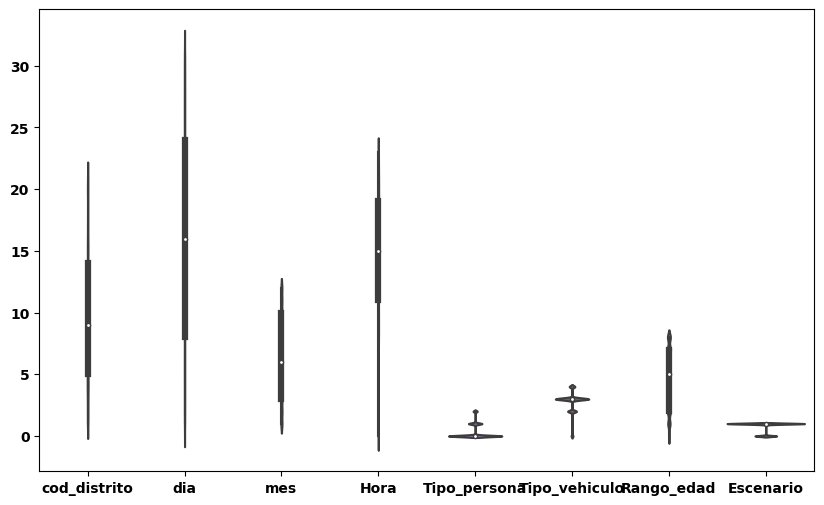

In [224]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(10,6))
sns.violinplot(data=df_cod_levisidad, orient='v')
plt.show()

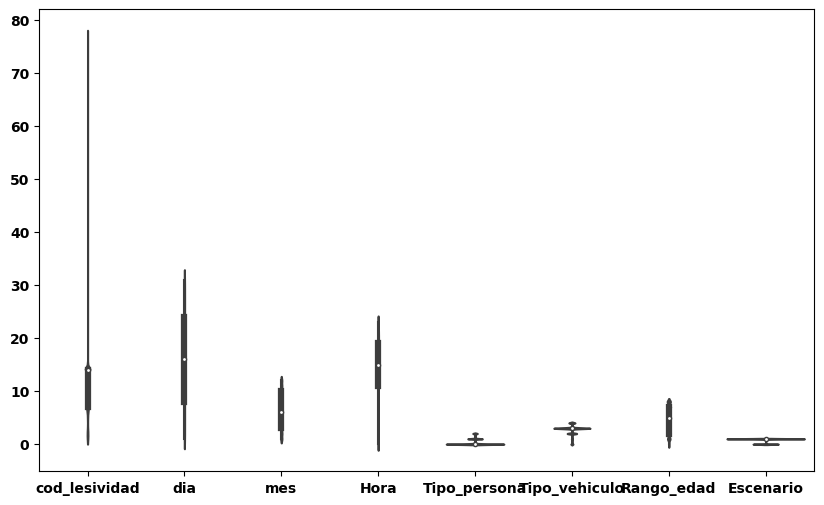

In [225]:
df_cod_distrito = df_accident_filt5.copy()
df_cod_distrito['Escenario'] = np.where(df_cod_distrito['cod_distrito']<df_cod_distrito['cod_distrito'].quantile(0.25),0,1)
df_cod_distrito.drop(['cod_distrito'],axis = 'columns', inplace = True)

plt.figure(figsize=(10,6))
sns.violinplot(data=df_cod_distrito, orient='v')
plt.show()

### **PASO1.** 


In [226]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_cod_levisidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_cod_levisidad['Escenario']

In [227]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[-1.51535203, -1.33320528, -1.20157044, ..., -0.53485253,
        -0.98597392, -0.91799431],
       [-1.51535203, -1.33320528, -1.20157044, ..., -0.53485253,
         0.26221897,  0.8613938 ],
       [ 0.0697884 , -1.67252454, -1.47718718, ..., -0.53485253,
         0.26221897,  1.21727142],
       ...,
       [ 0.77429526,  1.72066801, -0.9259537 , ...,  1.20618466,
         0.26221897, -0.20623907],
       [ 0.24591512,  1.72066801, -0.9259537 , ..., -0.53485253,
        -0.98597392,  0.8613938 ],
       [ 0.24591512,  1.72066801, -0.9259537 , ..., -0.53485253,
         0.26221897, -0.56211669]])

In [228]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal


<class 'pandas.core.frame.DataFrame'>


,cod_distrito,dia,mes,Hora,Tipo_persona,Tipo_vehiculo,Rango_edad
0,-1.515352,-1.333205,-1.201570,-0.968903,-0.534853,-0.985974,-0.917994
1,-1.515352,-1.333205,-1.201570,-0.968903,-0.534853,0.262219,0.861394
2,0.069788,-1.672525,-1.477187,-2.065525,-0.534853,0.262219,1.217271
3,0.245915,-1.672525,-1.477187,-1.151674,-0.534853,0.262219,1.217271
4,0.245915,-1.672525,-1.477187,-1.151674,-0.534853,0.262219,-1.273872
...,...,...,...,...,...,...,...
75043,0.774295,1.720668,-0.925954,-0.237822,1.206185,0.262219,0.505516
75044,0.774295,1.720668,-0.925954,-0.237822,1.206185,0.262219,0.505516
75045,0.774295,1.720668,-0.925954,-0.237822,1.206185,0.262219,-0.206239
75046,0.245915,1.720668,-0.925954,1.224341,-0.534853,-0.985974,0.861394


In [229]:
X_normal.describe().round(4)

,cod_distrito,dia,mes,Hora,Tipo_persona,Tipo_vehiculo,Rango_edad
count,75048.0000,75048.0000,75048.0000,75048.0000,75048.0000,75048.0000,75048.0000
mean,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.5154,-1.6725,-1.4772,-2.6138,-0.5349,-3.4824,-1.6297
25%,-0.8108,-0.8808,-0.9260,-0.6034,-0.5349,0.2622,-0.9180
50%,-0.1063,0.0241,-0.0991,0.1277,-0.5349,0.2622,0.1496
75%,0.7743,0.9289,1.0034,0.8588,-0.5349,0.2622,0.8614
max,2.0072,1.7207,1.5546,1.5899,2.9472,1.5104,1.2173


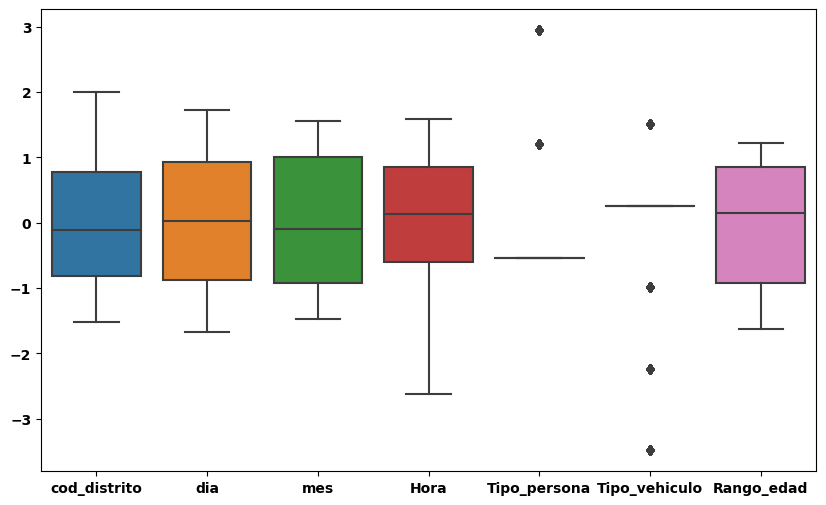

In [230]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(10,6))
sns.boxplot(data=X_normal, orient='v')
plt.show()

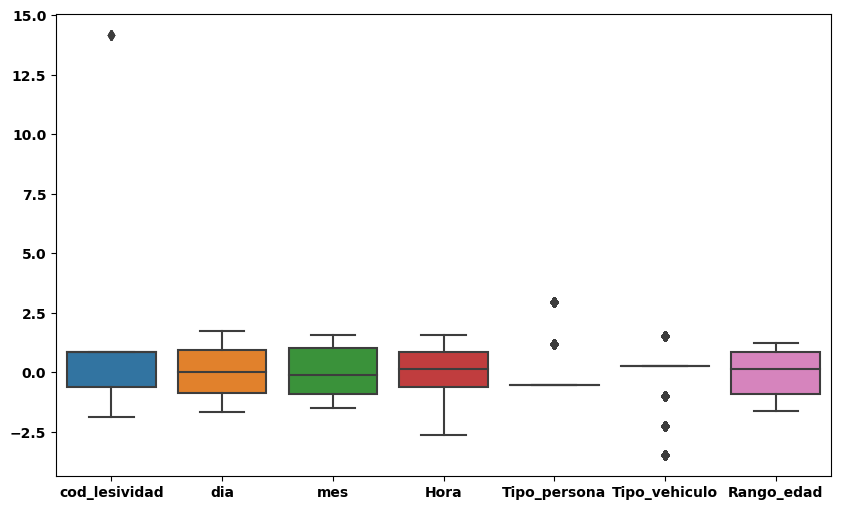

In [231]:
X1 = df_cod_distrito.drop('Escenario', axis='columns')

y1 = df_cod_distrito['Escenario']

from sklearn.preprocessing import StandardScaler
escalado1 = StandardScaler().fit(X1)
dataset_normal1 = escalado1.transform(X1)

X_normal1 = pd.DataFrame(dataset_normal1, columns=X1.columns)

plt.figure(figsize=(10,6))
sns.boxplot(data=X_normal1, orient='v')
plt.show()

## El clasificador

### **Paso 1.**  Dividir el dataset en Training y Test

In [232]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=100)


In [233]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

60038
15010


75048

In [234]:
# la segunda escencia (dia)

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_normal1, y1, test_size=0.2, random_state=100)

print(X_train1.shape[0])
print(X_test1.shape[0])
X_train1.shape[0] + X_test1.shape[0]


60038
15010


75048

### **Paso 2.** Cargar y elegir el modelo de regresión logística


In [235]:
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)

In [236]:
# lo mismo prara la segunda  escogido(cod_distrito)
from sklearn.linear_model import LogisticRegression
log_r1 = LogisticRegression(max_iter=1000,
                            random_state=100)


### **``Paso 3``**. Entrenar el modelo de regresión logística con los datos de entrenamiento

In [237]:
# Entrenar el modelo
log_r.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=100)

In [238]:
# LA SEGUNDA 
log_r1.fit(X_train1,y_train1)

LogisticRegression(max_iter=1000, random_state=100)

### **``Paso 5.``** Obetener las predicciones

In [239]:
# Calcular las predicciones con el conjunto de datos de prueba
y_pred = log_r.predict(X_test)

# Imprimir la salida del modelo(la lesividad)
print(y_pred) 

[1 1 1 ... 1 1 1]


In [240]:
# Calcular las predicciones con el conjunto de datos de prueba
y_pred1 = log_r1.predict(X_test1)

# Imprimir la salida del modelo(la lesividad)
print(y_pred)

[1 1 1 ... 1 1 1]


### **Paso 6.** Evalución del modelo a través de sus métricas

In [241]:
from sklearn.metrics import accuracy_score
# CALCULAR EL PORCENTAJE DE CASOS QUE EL MODELO HA ACERTADO
accuracy_score(y_test, y_pred)

0.7807461692205196

In [242]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.46      0.10      0.16      3235
           1       0.80      0.97      0.87     11775

    accuracy                           0.78     15010
   macro avg       0.63      0.53      0.52     15010
weighted avg       0.72      0.78      0.72     15010



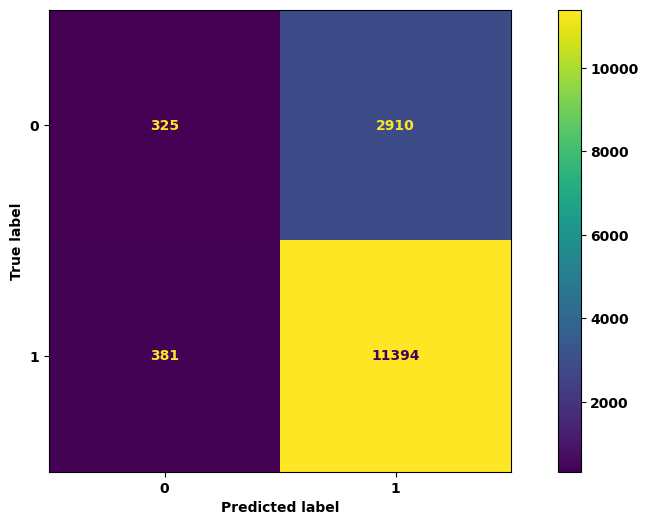

In [243]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                                display_labels=log_r.classes_)
disp.plot()

plt.show()

In [244]:
# Calcular el área bajo la curva de funcionamiento del receptor 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.5340534953090698

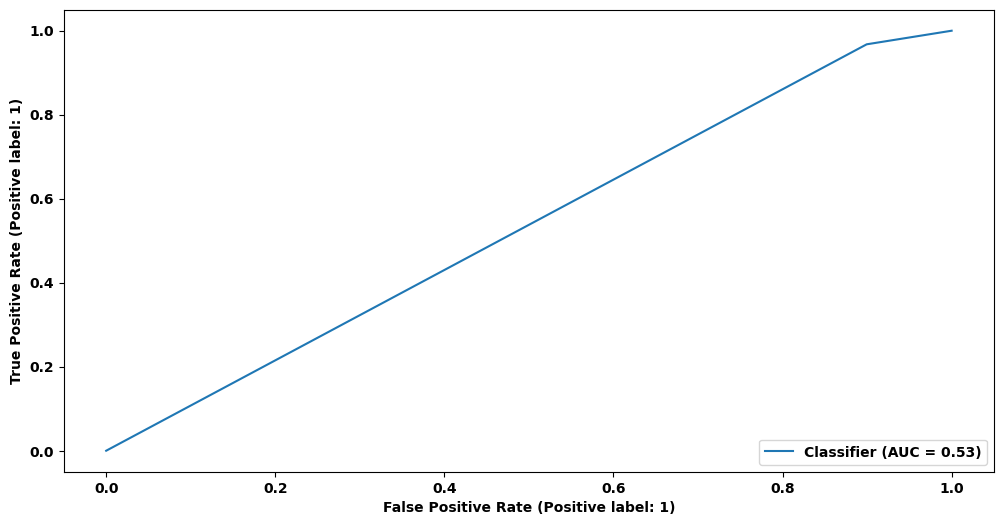

In [245]:
# Graficar la curva ROC( Receiver Operating Characteristic)
# AUC (Area Under the Curve)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,y_pred)
plt.show()

accuracy_score 0.7562958027981346
classification_report
               precision    recall  f1-score   support

           0       0.32      0.06      0.10      3658
           1       0.76      0.96      0.85     11352

    accuracy                           0.74     15010
   macro avg       0.54      0.51      0.48     15010
weighted avg       0.65      0.74      0.67     15010



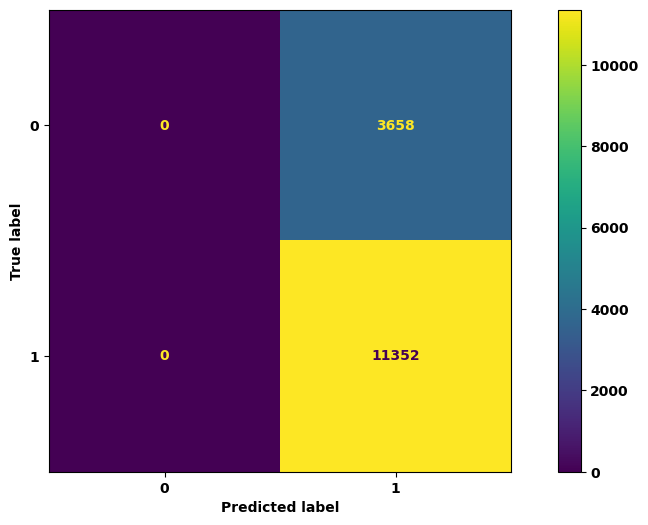

roc_auc_score 0.5


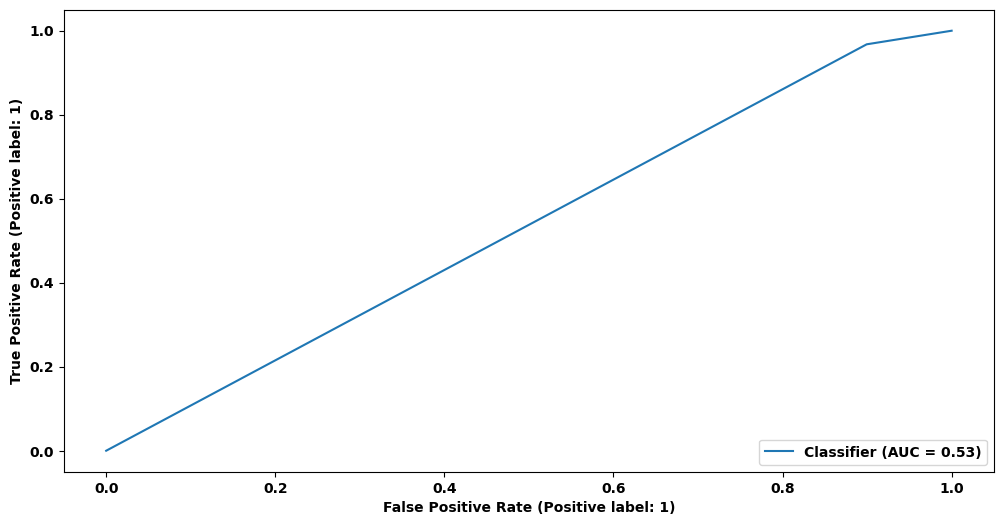

In [246]:
# la segunda escenario (cod_distrito)

from sklearn.metrics import accuracy_score
# CALCULAR EL PORCENTAJE DE CASOS QUE EL MODELO HA ACERTADO
print('accuracy_score',accuracy_score(y_test1, y_pred1))

from sklearn.metrics import classification_report

print('classification_report\n',classification_report(y_test1, y_pred,zero_division=0))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test1, y_pred1),
                                display_labels=log_r.classes_)
disp.plot()

plt.show()

# Calcular el área bajo la curva de funcionamiento del receptor 
from sklearn.metrics import roc_auc_score
print('roc_auc_score',roc_auc_score(y_test1, y_pred1))
# Graficar la curva ROC( Receiver Operating Characteristic)
# AUC (Area Under the Curve)
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test,y_pred)
plt.show()